<a href="https://colab.research.google.com/github/aryanfaghihi/ai-course/blob/master/NLP%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Make a copy

**Follow the following steps to make your own copy. You will lose your changes if you don't make your own copy!**

From the tooltip above, you should see 

File | Edit | View | Insert | Runtime | Tools | Help

1. Click on **File**
2. Click on **Save a copy in Drive**

## Import

Let's import the required packages and setup some settings that will help us in this notebook.

In [ ]:
# import the required packages
from fastai.text import *
import warnings

# ignore Python warnings
warnings.filterwarnings("ignore")

# Data

Today we will be looking at a dataset that contains a bunch of text and an emoji associated with it! You probability guessed, we are going to train a model that takes a sentence as an input and suggests an emoji for it.

In [ ]:
data_url = 'https://raw.githubusercontent.com/TetsumichiUmada/text2emoji/master/data/psychExp.txt'


> At the end of this session you will be able to write a sentence and the model suggests an emoji for it


## Looking at data

Today, we have a more challenging dataset to work with. This is because it is a [txt file](https://raw.githubusercontent.com/TetsumichiUmada/text2emoji/master/data/psychExp.txt) without any commas to seperate (which means no csv file). But thanks to `pandas` we have can deal with this complexity. Let's look at a sample row:
```
[ 1.  0.  0.  0.  0.  0.  0.] During the period of falling in love, each time that we met and especially when we had not met for a long time.
```

We would like to make a table that looks like this instead:

label | text
--- | ---
`1.  0.  0.  0.  0.  0.  0.` | `During the period of falling in love, each time that we met and especially when we had not met for a long time`
... | ...



We can use these arguments for `read_csv()` to achieve it:


*   **sep**: Its value should be `]` so rows would split to:

label | text
--- | ---
**[**1.  0.  0.  0.  0.  0.  0. | ` During the period of falling in love, each time that we met and especially when we had not met for a long time`
... | ...

*   **escapechar**: We have an extra `[` at the start of rows. If we pass this argument with `[` value, we're almost done.

label | text
--- | ---
1.  0.  0.  0.  0.  0.  0. | ` During the period of falling in love, each time that we met and especially when we had not met for a long time`
... | ...

*   **skipinitialspace**: If this argument is set `True`, The first *empty space* of our **text** value is ommited.

In [ ]:
# read csv using pandas
data = pd.read_csv(data_url,sep="]", escapechar="[", skipinitialspace=True, header = None)

# assign column names
data.columns=["labels","texts"]

In [ ]:
# view a subset of the data
data.head()

,labels,texts
0,1. 0. 0. 0. 0. 0. 0.,"During the period of falling in love, each tim..."
1,0. 1. 0. 0. 0. 0. 0.,When I was involved in a traffic accident.
2,0. 0. 1. 0. 0. 0. 0.,When I was driving home after several days of...
3,0. 0. 0. 1. 0. 0. 0.,When I lost the person who meant the most to me.
4,0. 0. 0. 0. 1. 0. 0.,The time I knocked a deer down - the sight of ...


Labels are list of 7 binary values (the technical term for this is one-hot encoding). Each value represents a feeling so let's convert our labels to a more human-readable style like **emojis**.

In [ ]:
# replace the 0s and 1 labels with emojis
data = data.replace(' 1.  0.  0.  0.  0.  0.  0.', '😂') # joy 
data = data.replace(' 0.  1.  0.  0.  0.  0.  0.', '😱') # fear
data = data.replace(' 0.  0.  1.  0.  0.  0.  0.', '😠') # anger
data = data.replace(' 0.  0.  0.  1.  0.  0.  0.', '😢') # sadness
data = data.replace(' 0.  0.  0.  0.  1.  0.  0.', '🤢') # disgust
data = data.replace(' 0.  0.  0.  0.  0.  1.  0.', '😳') # shame
data = data.replace(' 0.  0.  0.  0.  0.  0.  1.', '😔') # guilt

In [ ]:
# view the data again to make sure everything looks good
data.head()

,labels,texts
0,😂,"During the period of falling in love, each tim..."
1,😱,When I was involved in a traffic accident.
2,😠,When I was driving home after several days of...
3,😢,When I lost the person who meant the most to me.
4,🤢,The time I knocked a deer down - the sight of ...


Once we're happy with everything, we can save our csv to be used later.

In [ ]:
# save to csv
data.to_csv('dataset.csv', index=None)

Great, now let's explore our dataset a little further.

In [ ]:
# use info to get a summary of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7480 entries, 0 to 7479
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  7480 non-null   object
 1   texts   7480 non-null   object
dtypes: object(2)
memory usage: 117.0+ KB


---

Can you count the number of each emoji in our dataset?

---

In [ ]:
# count the number of different emojis
## YOUR CODE HERE

data.groupby('labels').describe()

texts                                                               
       count unique                                                top freq
labels                                                                     
😂       1084   1073       Getting into this university to do medicine.    3
😔       1057   1053                    Not finishing homework in time.    2
😠       1080   1080  When my mother rejected my boyfriend and made ...    1
😢       1079   1052                          When my grandfather died.    8
😱       1078   1071                                  Before the examn.    3
😳       1045   1038                       Not doing well in the examn.    4
🤢       1057   1056  I saw a program on T.V where they had to saw a...    2

## Language Model dataloader

Hopefully you remember what `TextLMDataBunch` does - **tokenizing** our dataset. 

---

🤔 REVIEW: What was Tokenizing again?

Right now we have a clean dataset of different texts and their associated emojis. The only problem is that computers can't work with texts or understand them. Tokenizing is the process of categorising words and then assigning a unieque number to each category.

--- 

In [ ]:
# create the datataloder from the csv file + tokenization
data_lm = TextLMDataBunch.from_csv(".", 'dataset.csv')

And this is the result of tokenizing our dataset:

In [ ]:
# look at a batch of the data
data_lm.show_batch()

idx,text
0,"to help me move but broke her promise because of some hindrance . xxbos xxmaj my mother and her friends were speaking badly about my father when they were separated , and my brothers and sisters and myself were allowed to listen . xxbos xxmaj when i met a friend that i had n't seen for some time . xxbos xxmaj when i had to travel alone , xxunk for"
1,"no firm view of the whole thing and therefor was not able to join the conversation . xxbos xxmaj criticizing my mother when she refused to drive with the radio on . i told her that i thought she was n't intelligent enough to cope with the radio . xxbos i went to a lecture and once again it had been cancelled , this was the second time . xxmaj"
2,"my friend died in a hospital . xxmaj my friend was crying and i was sad , too . xxbos xxmaj when i saw someone eating live worms . xxbos i had stayed for months without seeing mother because our holidays were short and my home is far . xxmaj some times , mother came to see me at school , i was very joyful , and i did n't"
3,"xxbos xxmaj my parents did not let me go on holidays with my friends . xxbos xxmaj when i met friends i had not seen for the last 2 - 4 years . xxbos i received a letter of acceptance from xxup unza . xxbos xxmaj during a recent meeting , xxmaj xxunk a showed his xxunk and xxunk in the notes xxunk . xxmaj though his curiosity could not"
4,"xxunk me on the way home . xxbos xxmaj getting into this university to do medicine . xxbos i felt ashamed of my body in spite of knowing that it is more or less beautiful and also knowing that my boyfriend xxunk me beautiful , but this was only in the beginning . xxbos xxmaj when i received the best xxunk award at the inter - college drama competition ."


## Classifier dataloader

So now we have our language model dataloader. We're ready to train a language model. But before that let's create a **classifier** dataloader.

In [ ]:
# create dataloader for classifier 
data_clas = TextClasDataBunch.from_csv(".",             # path to dataset
                                       'dataset.csv',   # path to csv 
                                       vocab=data_lm.train_ds.vocab, # tokenizer vocab 
                                       bs=32)           # batch size

Ok now we can take a look at our classifier data.

In [ ]:
data_clas.show_batch()

text,target
xxbos a few days back i was waiting for the bus at the bus stop . xxmaj before getting into the bus i had prepared the exact amount of coins to pay for the bus fair and when i got into the bus i put these coins into the box meant to collect the bus fair . i thought that i had paid and wanted to get inside . xxmaj,🤢
"xxbos xxmaj at secondary school , one of my classmates lost her xxunk key . xxmaj during a class i saw two other classmates holding a key and talking secretly . i do not know why i suspected them , also another classmate xxunk me . xxmaj he xxunk that these people had only one key in the key - ring , this had seemed strange to him . xxmaj",😔
"xxbos xxmaj one night during dinner my nephew was naughty , so i quarrelled with my parents . i regreted this as my nephew was only two years old and i had to tolerate him ! xxmaj the quarrel made my father think that his children may not take care of him in the future ( it was a slip of the tongue and this made me realize that my",😔
"xxbos xxmaj last semester when i dated a girl whom i 've known for almost a year . xxmaj however one night she said she wanted us to be "" "" just friends "" "" . i xxunk this to a friend xxmaj xxunk i was really suffering . a month or two later he broke up with his old girlfriend and they started going out regularly . i have",😠
"xxbos i was at home alone when i realized that a young xxunk approached our house . i hid because i did not want to xxunk it . xxmaj it xxunk . xxmaj some time later , when i thought that it had already run away , i saw it lying on our xxunk . i came xxunk and saw that it was terribly xxunk . i informed the xxunk",😢


---

Do you notice any difference between `data_clas` and `data_lm`?

---

# Model

## Languge Model

Ok Finally It's time to train our **language model**. This model would be trained to know how words (tokens) are related to other tokens and generally how series of words make meaning. In other words, teaching the model how to speak English.

In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

Advanced side note on the parameters:

> * `AWD_LSTM` is the architecture we will be using for training our language model. The details of this architecture is well beyond the scope of this course
* `drop_mult` is the rate for dropout. Again this is will beyond the scope of this unit. In practice though, this helps with reducing the chance of overfitting in our model.

For fine-tuning a language model, you need to know what's the best learning rate. Like previous example, `lr_find()` can help us with this.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


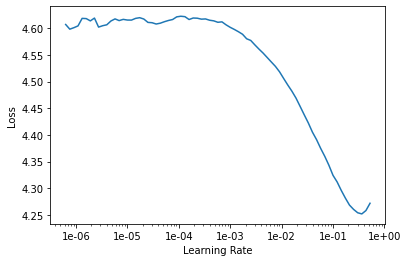

In [ ]:
# find the appropriate learning rate
learn.lr_find()
learn.recorder.plot(skip_end=15)

---

Can you guess what `learning rate` we should choose?

---

In [ ]:
# start training the language model
learn.fit_one_cycle(4, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.533230,4.162245,0.247188,00:06
1,4.307503,3.853182,0.275201,00:06
2,4.122085,3.745854,0.284196,00:06
3,4.002868,3.729653,0.284911,00:07


---

What does this accuracy represent? (hint, think about why we have a language model in the first place)

---

Before moving on, we need to save our language model to be used by our `classifier` in the next section.

In [ ]:
# save the language model
learn.save_encoder('language_model')

## Classifier

To this point we've trained a language model so our model can understand English quite well. All we have to do is training a **classifier** so we can find which emoji that best describes a sentence.

In [ ]:
# create model architecture for classifier
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

# load our language model from the previous section
learn.load_encoder('language_model');

In [ ]:
# start training the classifier
learn.fit_one_cycle(6, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.704892,1.556522,0.384770,00:05
1,1.661501,1.493460,0.442218,00:05
2,1.623647,1.464690,0.432198,00:05
3,1.581873,1.409077,0.486306,00:05
4,1.557181,1.372759,0.501002,00:05
5,1.486092,1.363644,0.488978,00:04


Let's unfreeze two more layers and continue training. Remember tha you can change `-2` to `-3` and so on if you want and see how it changes the accuracy over time.

In [ ]:
# unfreeze the last two layers
learn.freeze_to(-2)

# train the model on the last two layers
learn.fit_one_cycle(3, slice(1e-2/(2.6**4),1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.570237,1.496324,0.438210,00:06
1,1.439217,1.280986,0.535738,00:06
2,1.290104,1.221485,0.553106,00:06


⭐ What do you think about differences of this example and the IMDb reviews example classifier?

## Testing

In our test we have a function called `predict` which gets a `sentence` as input and then:


1.   Gets a `sentence` as input.
2.   Guesses the best possible pattern for the sentence.
3.   Finds the appropriate class (emoji) for that pattern.
4.   Returns the emoji.


In [ ]:
def predict(sentence):
  pred_idx = learn.predict(sentence)[1]
  return data_clas.classes[pred_idx]

In [ ]:
predict("I had an accident!")

'😱'

##Fine Tuning

Ok we've made it! 🎉

But we can always try to improve the accuracy of our model.

So let's call  `lr_find()` again to find out which learning rate is appropriate.

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


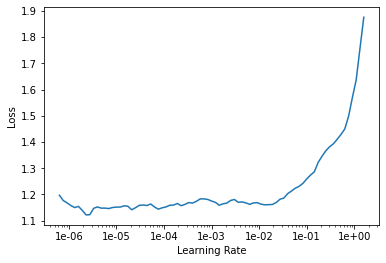

In [ ]:
# find an appropriate learning rate
learn.lr_find()
learn.recorder.plot()

Looks like `1e-3` is a good learning rate to choose in this case because it is the last sharp drop before an exponential increase.

Unfreeze to train more layers of our model. This will make our model more accurate.

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(8, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.228175,1.213254,0.567134,00:14
1,1.154814,1.183909,0.570474,00:14
2,1.066858,1.141165,0.597862,00:13
3,0.966961,1.115286,0.615230,00:11
4,0.890373,1.108917,0.618570,00:13
5,0.827947,1.111292,0.621242,00:13
6,0.780169,1.108582,0.619238,00:12
7,0.753262,1.116989,0.626586,00:11


So After training our model again, give it one more shot and test it out with more challenging sentences to classify.

In [ ]:
predict("that is so sad, I'm sorry")

'😢'

# Your turn!

## Setup

We want to use Amazon reviews dataset and guess the ratings (out of 5) for each review.

In [ ]:
# download and unzip the dataset
path = untar_data(URLs.AMAZON_REVIEWS)

# read the data using pandas
data = pd.read_csv(path/'train.csv', header=None)

# select a subset of the dat 
data = data.iloc[:100000]

# fill in the missing values with 0
data = data.fillna(0)

# create validation entry (is_valid column)
data.iloc[:,2] = False      
data.iloc[80000:,2] = True

# change the column names
data.columns = ['label', 'text', 'is_valid']

# save to csv
data.to_csv('data.csv', index=False)

## Data

In [ ]:
## Print the info() of the data 
### YOUR CODE HERE



In [ ]:
## Print the .head() of the data to have a quick look
### YOUR CODE HERE



In [ ]:
## show the last comment
### YOUR CODE HERE



In [ ]:
##show data group by label column
### YOUR CODE HERE


## Model

Setup the dataloaders

In [ ]:
# language model dataloader
data_lm = TextLMDataBunch.from_csv('.', 'data.csv')

# view a batch of it
data_lm.show_batch()

idx,text
0,"a year xxbos xxmaj not all that great ... xxbos xxmaj stud finder xxbos xxmaj xxunk game playing & xxunk xxbos l'amour xxmaj sacketts - xxmaj classic xxmaj cowboy xxbos xxmaj movie xxmaj blu ray disc is ok , the other 2 disc are not xxbos xxmaj the xxmaj xxunk people are our friends xxbos un xxrep 6 h xxbos xxmaj as advertised ... xxbos a boon for a start"
1,thought it was xxbos xxmaj horrible textbook xxbos good xxbos xxmaj his worst effort to date xxbos never xxunk xxbos xxmaj always low or dead xxbos xxmaj the xxmaj sound of xxmaj music xxbos xxup great i xxup xxunk xxup know a 17 xxup year xxup old xxup could xxup write xxup this xxup good xxrep 4 ! xxbos xxmaj great xxbos xxmaj stunts cool ? ( xxmaj someone xxup
2,great xxbos xxmaj hudson xxmaj rules xxbos xxmaj great for xxmaj bionicle xxmaj lovers xxbos xxmaj these books are terrible ! xxbos xxmaj eh xxbos not as good as the old ones xxbos xxmaj it works ! xxbos xxmaj this is a magic blanket ! xxbos xxmaj worst xxmaj zombie xxmaj movie xxmaj ever xxrep 4 ! xxbos xxmaj the xxmaj queen of xxmaj death from xxmaj john xxmaj milne
3,"9 a xxunk ... xxbos xxmaj xxunk to live xxrep 4 . xxbos xxmaj love xxmaj julia , not xxmaj julie xxbos xxmaj good xxmaj job xxbos xxmaj review of xxmaj xxunk guide to xxmaj dogs xxbos xxmaj xxunk xxmaj issues xxbos xxmaj flat xxmaj live xxmaj recordings xxbos xxmaj well written xxbos xxup the xxup gods xxup awaken xxbos xxmaj very good , but wrong ending . xxbos xxmaj"
4,"xxmaj flight of xxmaj grey xxmaj wolf xxbos a good year xxbos xxmaj ugh xxbos "" xxmaj what he 's saying , i know not ... "" xxbos xxmaj spider - xxmaj man xxup ii is a safe family film that stays fairly xxrep 4 . xxbos xxmaj very disappointing xxbos hard to understand xxbos xxmaj the xxmaj great xxmaj finale xxbos xxmaj tragic xxmaj production of a xxmaj great"


In [ ]:
# classifier dataloader
data_clas = TextClasDataBunch.from_csv('.', 'data.csv', vocab=data_lm.train_ds.vocab, bs=32)

# view a batch of it
data_clas.show_batch()

text,target
"xxbos xxmaj motorola xxmaj xxunk xxup xxunk , xxmaj xxunk , xxmaj xxunk , xxmaj xxunk xxup xxunk , xxup xxunk , xxup xxunk xxmaj xxunk xxup xxunk , xxup xxunk , xxmaj xxunk , xxup xxunk , xxup xxunk , xxup xxunk - xxmaj xxunk xxup oem xxmaj original xxmaj auto xxmaj car xxmaj charger xxmaj xxunk",1
"xxbos xxmaj ten xxmaj minutes of xxmaj action , xxmaj five xxmaj minutes of xxmaj drama , xxmaj two xxmaj hours and xxmaj twenty xxmaj minutes of xxmaj awkward xxmaj teenage xxmaj angst",2
xxbos xxmaj you need a giants hand to handle ; the xxunk of xxmaj xxunk to pick up ; precise vision to get it back on its cradle correctly,1
xxbos xxmaj do n't xxmaj buy xxmaj this xxmaj book ! xxmaj it will xxmaj scare the xxmaj xxunk xxmaj out of xxmaj you xxrep 6 !,1
xxbos [ xxmaj three - and - a - half out of five ] xxmaj updated attempt to copy xxmaj brotherhood of the xxmaj bell !,3


Next you should

1. Train your language model
2. Train your classifier 

Follow the steps from above and write your own code!

In [ ]:
# fine-tune your language model here
## YOUR CODE HERE

# 1. define your learner
# 2. find the appropriate learning rate
# 3. train!
# 4. save your language model

In [ ]:
# create your classifier
## YOUR CODE HERE

# 1. define your learner
# 2. load your language model
# 2. find the appropriate learning rate
# 3. train!

# Summary

Today we covered: 
* How to deal with more complex data 
* How to train a multi-class classifier, that is classifying multiple emojis rather than just positive/negative
* Further fine-tuning both the language model and the classifier